In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

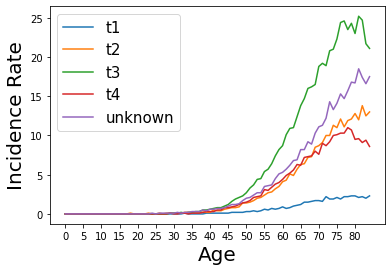

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

INC_TARGET_PATH = '../data/targets/Pancreatic Cancer SEER Rates.xlsx'
target_incid=pd.read_excel(INC_TARGET_PATH, sheet_name='Incidence by T stage_single age').iloc[3:-1,[0,4,7,10,13,16]]
target_incid.columns=['age','t1', 't2', 't3', 't4', 'unknown']

# plt.figure(figsize=(10, 5)) 
plt.plot(target_incid['age'].tolist()[:-1], target_incid['t1'][:-1])
plt.plot(target_incid['age'].tolist()[:-1], target_incid['t2'][:-1])
plt.plot(target_incid['age'].tolist()[:-1], target_incid['t3'][:-1])
plt.plot(target_incid['age'].tolist()[:-1], target_incid['t4'][:-1])
plt.plot(target_incid['age'].tolist()[:-1], target_incid['unknown'][:-1])

plt.legend(['t1', 't2', 't3', 't4', 'unknown'], fontsize=15)
plt.xticks(list(range(0,85,5)))
plt.ylabel('Incidence Rate', fontsize = 20)
plt.xlabel('Age', fontsize = 20)
plt.show()

In [3]:
target_incid

,age,t1,t2,t3,t4,unknown
3,0,0,0,0,0,0
4,1,0,0,0,0,0
5,2,0,0,0,0,0
6,3,0,0,0,0,0
7,4,0,0,0,0,0
...,...,...,...,...,...,...
84,81,2.1,12,25.2,9.6,18.5
85,82,2.2,13.8,24.7,9.1,17.4
86,83,2,12.5,21.7,9.4,16.6
87,84,2.3,13,21.1,8.6,17.5


In [4]:
incid_count=pd.read_excel(INC_TARGET_PATH, sheet_name='Incidence by T stage_single age').iloc[3:-1,[0,3,5,8,11,14,17]]
incid_count.columns=['age','pop','t1c','t2c','t3c','t4c','unknown_count']

In [6]:
incid_count

,age,pop,t1c,t2c,t3c,t4c,unknown_count
3,0,13833705,0,1,0,0,0
4,1,13771391,0,0,0,0,1
5,2,13762268,0,0,0,0,0
6,3,13819901,0,0,0,0,0
7,4,13873933,0,1,3,0,1
...,...,...,...,...,...,...,...
84,81,3757385,80,450,948,360,695
85,82,3535306,77,487,874,323,615
86,83,3304328,66,413,718,312,548
87,84,3045166,70,395,644,263,533


In [7]:
new_row = {}
prop = []
for i, row in incid_count.iterrows():
    if row['t1c':'t4c'].sum() == 0:
        new_row[row['age']] = np.array([0,0,0,0])
    else:
        add = np.array(row['t1c':'t4c'])/row['t1c':'t4c'].sum() *row['unknown_count']
        prop.append(np.array(row['t1c':'t4c'])/row['t1c':'t4c'].sum())
        new_row[row['age']] = (np.array(row['t1c':'t4c']) + add)/row['pop']*100000
new_row_df = pd.DataFrame.from_dict(new_row, orient = 'index')
new_row_df.columns=['t1', 't2', 't3', 't4']

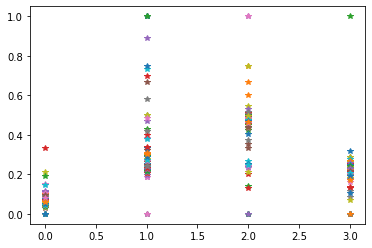

In [14]:
for i in prop:
    plt.plot(i, '*')

In [26]:
# Convert to numpy array (starts from age 18 to 84)
target_t1 = np.array(new_row_df['t1'][18:-1].tolist())
target_t2 = np.array(new_row_df['t2'][18:-1].tolist())
target_t3 = np.array(new_row_df['t3'][18:-1].tolist())
target_t4 = np.array(new_row_df['t4'][18:-1].tolist())

In [27]:
inc_target = {}
inc_target['T1'] = target_t1
inc_target['T2'] = target_t2
inc_target['T3'] = target_t3
inc_target['T4'] = target_t4

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [29]:
# define the true objective function
def objective(x, a, b, c):
    return a * x + b * x**2 + c

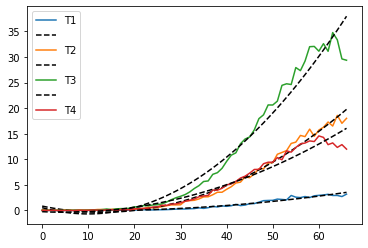

In [30]:
xdata = list(range(0,len(inc_target['T1'])))
smooth = {}
for i in ['T1', 'T2', 'T3', 'T4']:
    ydata = inc_target[i]
    popt, pcov = curve_fit(objective, xdata, ydata)
    plt.plot(xdata, inc_target[i])
    plt.plot(xdata, objective(np.array(xdata), float(popt[0]), float(popt[1]), float(popt[2])), 'k--')
    smooth[i] = objective(np.array(xdata), float(popt[0]), float(popt[1]), float(popt[2]))
plt.legend(['T1','','T2','','T3','','T4'])

In [31]:
smooth['T4']

array([-2.34029242e-01, -2.74785730e-01, -3.06690881e-01, -3.29744694e-01,
       -3.43947169e-01, -3.49298308e-01, -3.45798109e-01, -3.33446572e-01,
       -3.12243698e-01, -2.82189487e-01, -2.43283939e-01, -1.95527053e-01,
       -1.38918830e-01, -7.34592691e-02,  8.51628925e-04,  8.40138643e-02,
        1.76027437e-01,  2.76892347e-01,  3.86608595e-01,  5.05176179e-01,
        6.32595102e-01,  7.68865361e-01,  9.13986958e-01,  1.06795989e+00,
        1.23078416e+00,  1.40245977e+00,  1.58298672e+00,  1.77236500e+00,
        1.97059462e+00,  2.17767558e+00,  2.39360788e+00,  2.61839151e+00,
        2.85202648e+00,  3.09451279e+00,  3.34585044e+00,  3.60603942e+00,
        3.87507974e+00,  4.15297140e+00,  4.43971439e+00,  4.73530872e+00,
        5.03975439e+00,  5.35305140e+00,  5.67519975e+00,  6.00619943e+00,
        6.34605045e+00,  6.69475280e+00,  7.05230650e+00,  7.41871153e+00,
        7.79396790e+00,  8.17807560e+00,  8.57103465e+00,  8.97284503e+00,
        9.38350674e+00,  

In [32]:
def find_linear_interval(dat):
    for i in range(len(dat)):
        if dat[i]<0:
            idx_neg = i
    idx_pos = idx_neg + 1
    
    b = dat[idx_pos]*0.1
    y = dat[idx_pos]
    a = (y-b)/idx_pos
    
    lin_v = []
    for i in range(idx_pos):
        lin_v.append(a*i+b)
    return np.array(lin_v+list(dat)[idx_pos:])

In [35]:
smooth_mod = {}
smooth_mod['T1'] = find_linear_interval(smooth['T1'])
smooth_mod['T2'] = find_linear_interval(smooth['T2'])
smooth_mod['T3'] = find_linear_interval(smooth['T3'])
smooth_mod['T4'] = find_linear_interval(smooth['T4'])

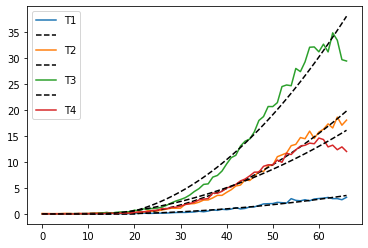

In [36]:
xdata = list(range(0,len(inc_target['T1'])))
smooth = {}
for i in ['T1', 'T2', 'T3', 'T4']:
    ydata = inc_target[i]
    popt, pcov = curve_fit(objective, xdata, ydata)
    plt.plot(xdata, inc_target[i])
    plt.plot(xdata, smooth_mod[i], 'k--')
plt.legend(['T1','','T2','','T3','','T4'])

In [37]:
smooth_inc = pd.DataFrame.from_dict(smooth_mod)

In [45]:
smooth_inc.columns = ['t1', 't2', 't3', 't4']

In [46]:
smooth_inc

,t1,t2,t3,t4
0,0.000905,0.000456,0.012321,0.000085
1,0.001384,0.000661,0.018481,0.000140
2,0.001863,0.000866,0.024641,0.000195
3,0.002342,0.001071,0.030801,0.000249
4,0.002822,0.001276,0.036962,0.000304
...,...,...,...,...
62,3.045573,16.843006,32.643664,13.976947
63,3.166250,17.551476,33.936416,14.484974
64,3.289239,18.274251,35.253774,15.001852
65,3.414541,19.011331,36.595739,15.527581


In [49]:
new_row_df = new_row_df.iloc[18:-1]

In [50]:
new_row_df = new_row_df.reset_index(drop = True)

In [53]:
new_row_df 

,t1,t2,t3,t4
0,0.010608,0.084862,0.000000,0.000000
1,0.000000,0.069428,0.034714,0.000000
2,0.021224,0.053059,0.031835,0.031835
3,0.008530,0.059712,0.025591,0.008530
4,0.026150,0.061016,0.026150,0.008717
...,...,...,...,...
62,3.165769,17.292585,31.113037,12.867317
63,2.934229,16.505037,34.770611,13.204030
64,2.938670,18.586133,33.355811,12.327147
65,2.722738,17.037739,29.620088,12.871125


In [54]:
smooth_inc

,t1,t2,t3,t4
0,0.000905,0.000456,0.012321,0.000085
1,0.001384,0.000661,0.018481,0.000140
2,0.001863,0.000866,0.024641,0.000195
3,0.002342,0.001071,0.030801,0.000249
4,0.002822,0.001276,0.036962,0.000304
...,...,...,...,...
62,3.045573,16.843006,32.643664,13.976947
63,3.166250,17.551476,33.936416,14.484974
64,3.289239,18.274251,35.253774,15.001852
65,3.414541,19.011331,36.595739,15.527581


In [42]:
smooth_inc.to_csv('../data/targets/smooth_inc.csv', index = None)